In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Newton's equations of motion
# v(t) = v(t-1) + a(t)*t
# x(t) = x(t-1) + v(t)*t + .5*a(t)*t^2

# Newton's law of gravitation
# r_squared = (x2-x1)**2 + (y2-y1)**2
# F=G*m1*m2/r_squared

# a1 = G*m1/r_squared

# center of mass = m1*x1(t)+m2*x2(t) / (m1+m2)
# com_x = m1*x1+m2*x2 / (m1+m2)
# com_y = m1*y1+m2*y2 / (m1+m2)

# handle the boundary conditions that arise when computing tan^-1
# results will be between -np.pi/2 & np.pi/2
def my_atan(delta_y, delta_x):
    # limit = 0.000000000001;
    # if (delta_x<limit): return np.pi/2;
    return np.arctan2(delta_y,delta_x);


m1 = 5.9722 * 10**24 # earth mass
m2 = 7.342 * 10**22 # moon mass
r_moon = 400000000 # m
# v_moon = 1022 # m/s
G=6.67*10**(-11)
Gmm = G*m1*m2; # precalc cuz they ain't changin'
# v for any orbital mass 
# a = g = v^2/r = G * m1 /r^2
# v^2 = G * m1 /r
# v = sqrt (G * m1 / r) -- escape velocity
escape_velocity = np.sqrt(G*m1/r_moon);
print("escape velocity:", escape_velocity);
                          
# protection when r_squared goes to shit (== 0)
def my_F(x1, x2, y1, y2, debug):
    limit = 0.0000001; # only get so close to each other
    r_squared = (x2-x1)**2 + (y2-y1)**2;
    if (r_squared > limit): F= Gmm /r_squared;
    else: F = 0; # of F = Gmm / limit;
    if (debug): print("F=",F);
    if (debug): print("==== r_squared: ",r_squared);    
    if (debug): print("r_sqrt: ", np.sqrt(r_squared));
    return F;
    

escape velocity: 997.9300326175177


In [2]:
# returns the center of mass x&y coordinates
def calc_center_of_mass(m1,x1,y1,m2,x2,y2):
    com_x = (m1*x1+m2*x2)/(m1+m2);
    com_y = (m1*y1+m2*y2)/(m1+m2);
    return [com_x, com_y];

# return the absolute magnitude of the relative coordinate between the 2 masses
def calc_r(x1,y1,x2,y2):
    return np.sqrt(np.abs((x2-x1)**2 + (y2-y1)**2));

# 1) the motion of the two point-particles in the plane, 
# 2) the motion of the center of mass coordinate, 
# 3) the motion of the relative coordinate, and 
# 4) the motion in the (r; r_) plane, where r is the absolute magnitude of the relative coordinate.
def run_round(label, iterations, delta_t, moon_vi):
    # initial conditions
    t=0;
    DEBUG = 0;
    v_moon = moon_vi # m/s

    # mass #1 - be the earth at the origin
    px1_i = 0; py1_i = 0;
    vx1_i = 0; vy1_i = 0;
    px1 = px1_i; py1 = py1_i; 
    vx1 = vx1_i; vy1 = vy1_i; 

    # mass #2 - be the moon
    px2_i = 0; py2_i = r_moon;
    vx2_i = v_moon; vy2_i = 0; # only x velocity, no y velocity
    px2 = px2_i; py2 = py2_i; 
    vx2 = vx2_i; vy2 = vy2_i; 

    # containers (for plot data)
    x1=[];
    y1=[];
    x2=[];
    y2=[];
    com_x=[];
    com_y=[];
    r_x=[];
    r_y=[];
    r=[];
    r_dot=[];
    r_prev = -1; # absolute mag will never be <0 again

    # main loop
    for i in range(0,delta_t*iterations):
        if (DEBUG): print("--------",i,"---------------");
        # save the current position
        if (DEBUG): print("@t=",t,"(x1,y1,x2,y2)=",round(px1,5),round(py1,5),round(px2,5),round(py2,5) )
        x1.append(px1);
        y1.append(py1);
        x2.append(px2);
        y2.append(py2);
        
        [comx,comy]= calc_center_of_mass(m1,px1,py1,m2,px2,py2)
        com_x.append(comx);
        com_y.append(comy);
        
        r_x.append(px2-px1);
        r_y.append(py2-py1);
        
        r_mag = calc_r(px1,py1,px2,py2);
        if (r_prev >= 0): 
            r_dot_ = (r_mag-r_prev)/delta_t;
            r_dot.append(r_dot_);
            r.append(r_mag);
            
        r_prev = r_mag;

        # calc F based on current coordinates of m1 & m2    
        F = my_F(px1, px2, py1, py2, DEBUG);

        # calc angle based on coordinates (pi correction may be needed)
        rad = my_atan((py2-py1),(px2-px1));

        deg = np.rad2deg(rad);
        if (DEBUG): print("deg: ",deg);    

        # calc acc mag, acc_x, acc_y for m1 & m2
        a1 = F / m1;
        if (DEBUG): print("a1: ",a1);    

        ax1 = a1 * np.cos(rad);
        ay1 = a1 * np.sin(rad);

        a2 = F / m2;
        if (DEBUG): print("a2: ",a2);        
        ax2 = a2 * np.cos(rad + np.pi);
        ay2 = a2 * np.sin(rad + np.pi);
        if (DEBUG): print("@t=",t,"(ax1,ay1,ax2,ay2)=",round(ax1,5),round(ay1,5),round(ax2,5),round(ay2,5) )
        # print("a1:",round(a1,5),"a2:",round(a2,5))

        vx1 += ax1 * t;
        vy1 += ay1 * t;    
        vx2 += ax2 * t;
        vy2 += ay2 * t;        
        if (DEBUG): print("@t=",t,"(vx1,vy1,vx2,vy2)=",round(vx1,5),round(vy1,5),round(vx2,5),round(vy2,5) )

        px1 += vx1 * t;
        py1 += vy1 * t;
        px2 += vx2 * t;
        py2 += vy2 * t;
        # print("i:",i,"x-diff=",px2-px1, "y-diff=",py2-py1)
        # get a new time before starting a new round
        t += delta_t


    size = 4
    fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, 
                                            figsize=(4*size, 4*size), 
                                            constrained_layout=True, 
                                            sharex=False, 
                                            sharey=False)
    my_title = label+ "  moon v_i = "+str(moon_vi)+" m/s";
    fig.suptitle(my_title, fontsize=24)

    ax1.set_title('objects plot of Earth and Moon')
    ax1.set_xlabel('x position')
    ax1.set_ylabel('y position')
    earth = ax1.scatter(x1, y1, s=100, marker ="o") # earth
    moon = ax1.scatter(x2, y2, marker ="+", linewidths = 1) # moon
    ax1.legend((earth, moon), ('earth', 'moon'), loc='upper right', shadow=True)

    ax2.set_title('center of mass coordinate')
    ax2.set_xlabel('center of mass x')
    ax2.set_ylabel('center of mass y')
    ax2.scatter(com_x, com_y, marker ="+", linewidths = 1)

    ax3.set_title('motion of relative coordinate (r)')
    ax3.set_xlabel('r_x')
    ax3.set_ylabel('r_y')
    ax3.scatter(r_x, r_y, marker ="+", linewidths = 1)

    ax4.set_title('phase diagram (r,r_dot)')
    ax4.set_xlabel('r')
    ax4.set_ylabel('r_dot')
    ax4.scatter(r, r_dot, marker ="+", linewidths = 1)

    plt.show()

    

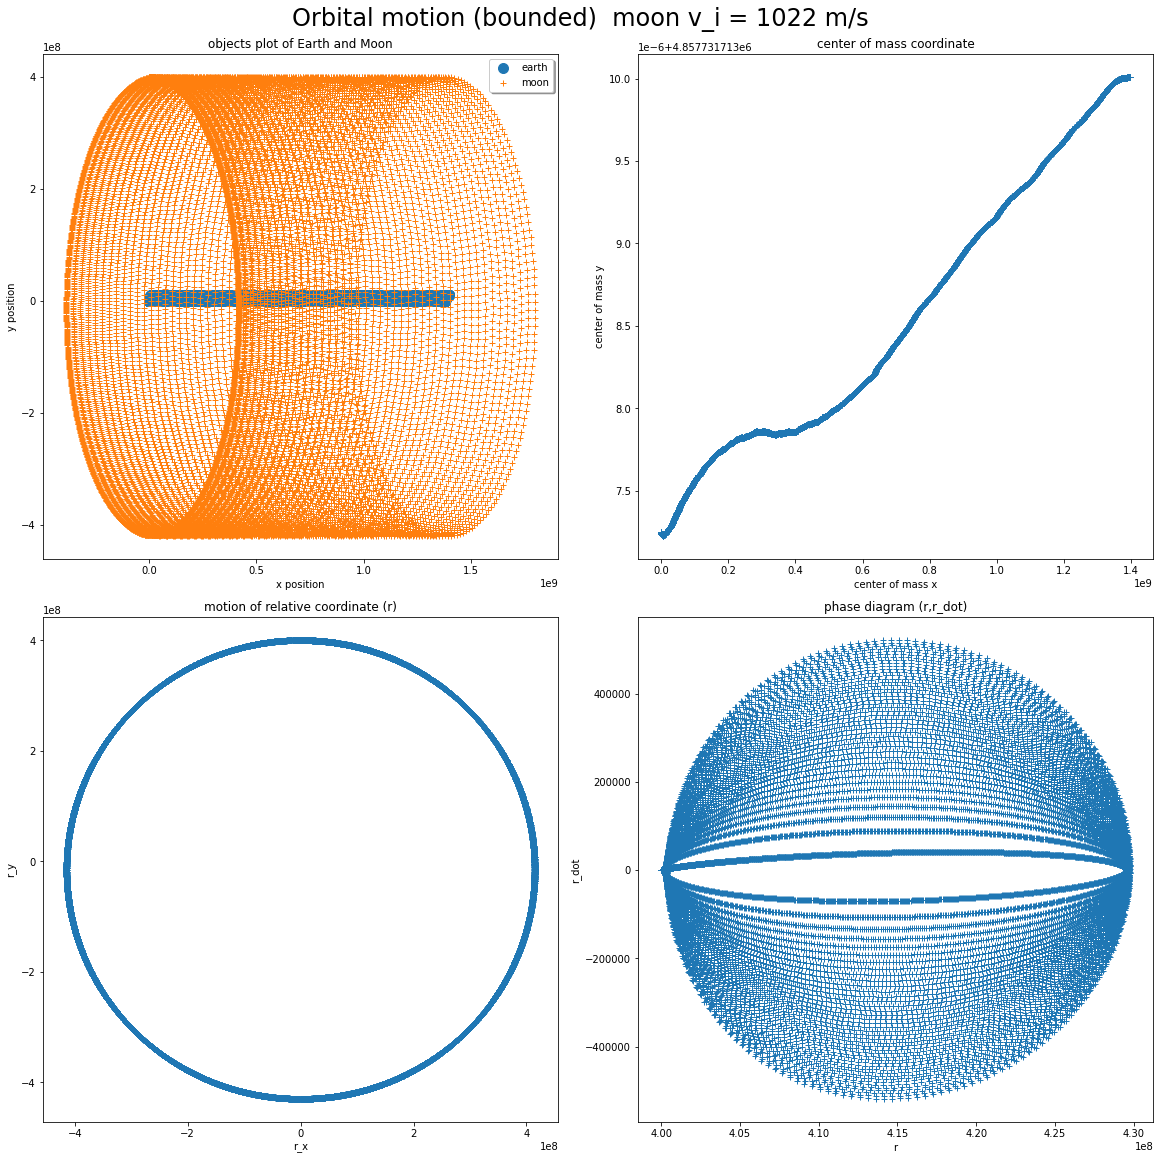

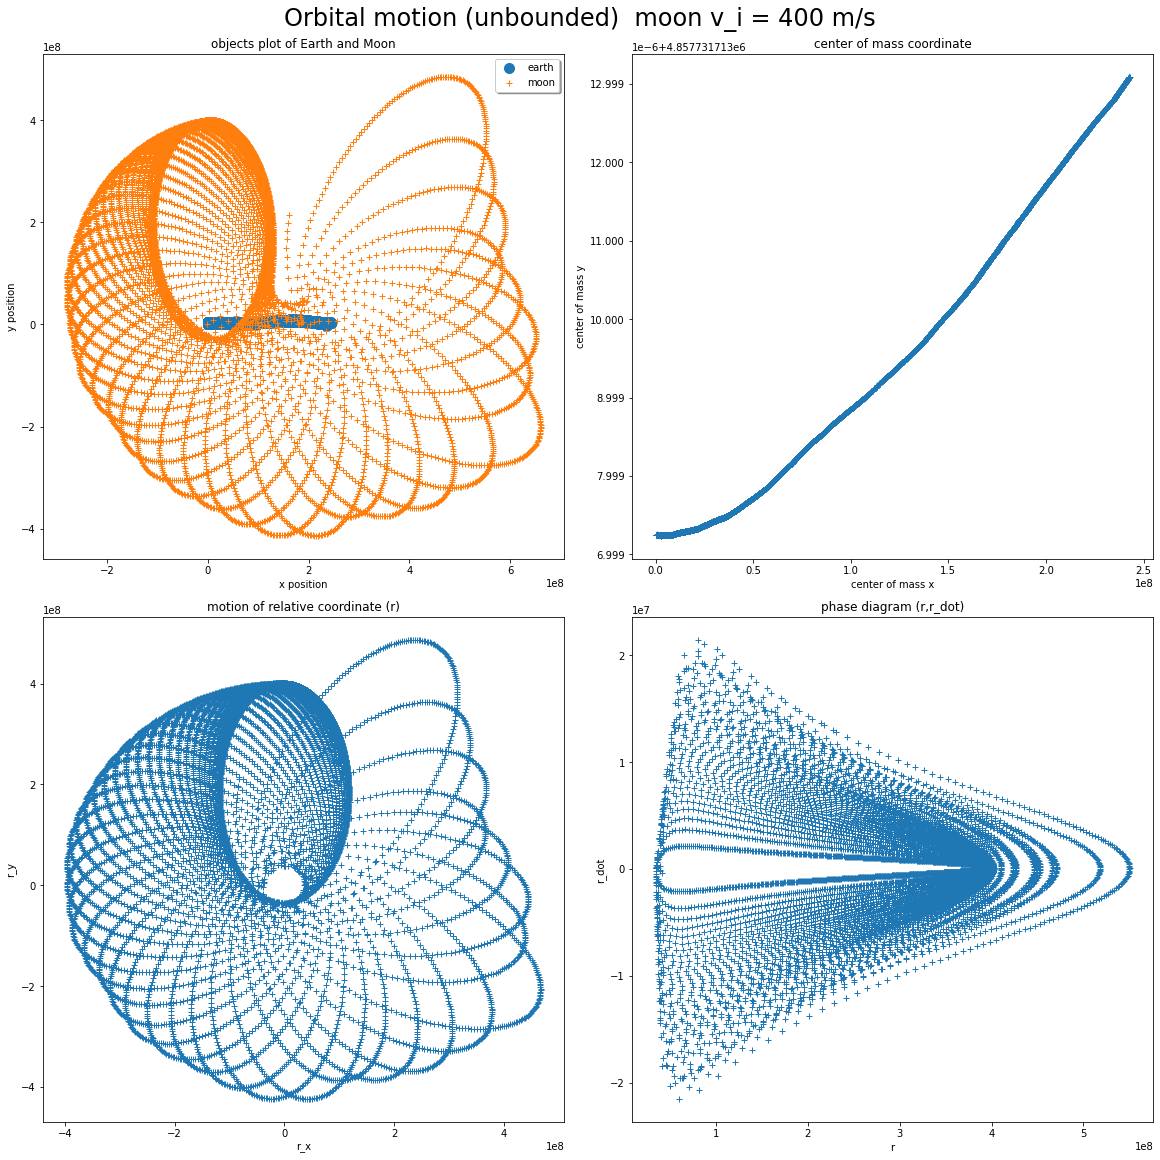

In [3]:
run_round(label="Orbital motion (bounded)", 
          iterations=15000, 
          delta_t=1, 
          moon_vi=1022);
print("");
print("");
run_round(label="Orbital motion (unbounded)", 
          iterations=10000, 
          delta_t=1, 
          moon_vi=400);